# Matplotlib and Seaborn- Python Libraries

Pandas → holds the data

Matplotlib → basic drawing tool (like pencil ✏️)

Seaborn → makes graphs look pretty automatically 🎨

# # First: Basic Setup (VERY IMPORTANT)

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Now load your dataset:
df = pd.read_csv('arbor_employee_data_pandas.csv')
df.head()

,First Name,Last Name,Department,Gender,Location,Joining Date,Joining Month,City,Country,Salary,Bonus
0,Cory,Schroeder,Finance,Male,San Francisco,16-11-2023,November,San Francisco,France,99121,8873
1,Jacqueline,Bowen,IT,Female,San Francisco,28-06-2023,June,San Francisco,India,77594,8206
2,Rhonda,Gonzalez,Marketing,Male,Boston,13-05-2020,May,Boston,Australia,85246,3130
3,Bryan,Clark,Sales,Male,Boston,24-05-2016,May,Boston,Japan,71683,11394
4,Mary,Mcdonald,Operations,Other,Houston,20-02-2020,February,Houston,France,134619,12109


# 2️⃣ Your Dataset (Simple Understanding)

Your data has columns like:

Department

Gender

Salary

Bonus

City

Country

We will use these to make graphs.

# MATPLOTLIB (Start here – very basic)

# 3️⃣ Bar Chart – Number of Employees per Department

In [3]:
# Question: How many employees are in each department?
# Step 1: Count employees
emp_dept = df['Department'].value_counts()

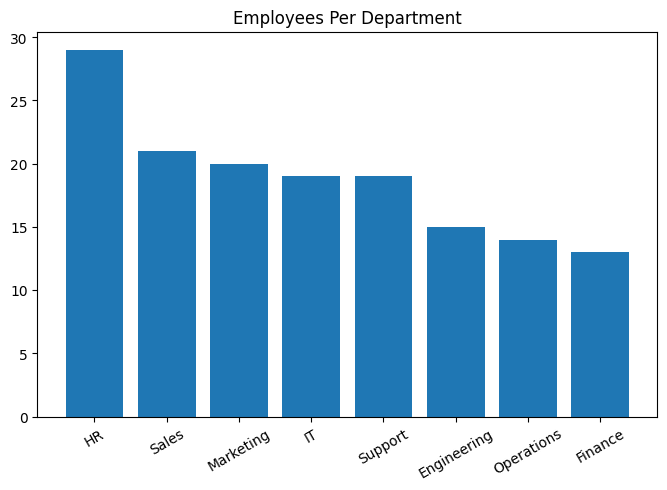

In [4]:
# Step 2: Draw the bar chart
plt.figure(figsize = (8, 5))
plt.bar(emp_dept.index, emp_dept.values)
plt.xlabel
plt.ylabel
plt.title('Employees Per Department')
plt.xticks(rotation = 30)
plt.show()

| Part                | Meaning                             |
| ------------------- | ----------------------------------- |
| `dept_count.index`  | Department names (`IT`, `HR`, etc.) |
| `dept_count.values` | Numbers (`15`, `10`, etc.)          |


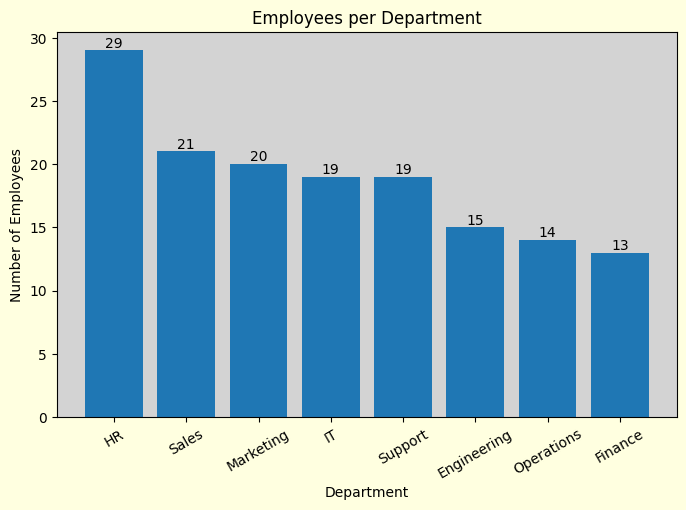

In [5]:
#full example with colors:
plt.figure(figsize = (8, 5), facecolor = 'lightyellow')
plt.bar(emp_dept.index, emp_dept.values, color = "lightgreen", width = 0.5)
plt.gca().set_facecolor("lightgray")
plt.xlabel('Department')
plt.xticks(rotation = 30)
plt.ylabel('Number of Employees')
plt.title('Employees per Department')
#plt.show()

#add numbers on top of bars
plt.bar(emp_dept.index, emp_dept.values)

for i, value in enumerate(emp_dept.values):
    plt.text(i, value, value, ha="center", va = "bottom")
plt.show()

In [6]:
#same graph on seaborn
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17508\40304724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Department", data = df,palette = "Set2")


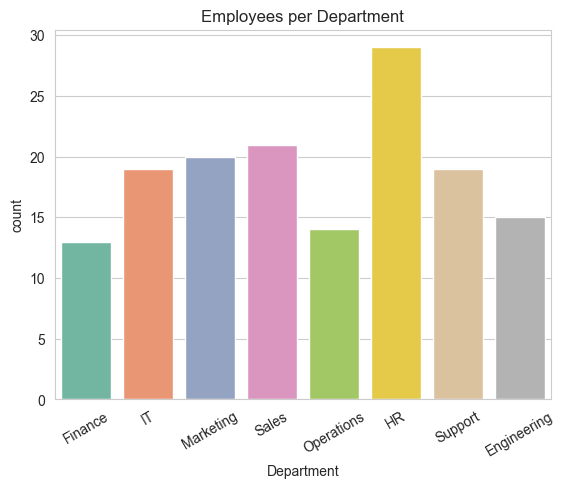

In [7]:
#one line seaborn code for same graph
sns.set_style("whitegrid")
sns.countplot(x = "Department", data = df,palette = "Set2")
plt.title("Employees per Department")
plt.xticks(rotation = 30)
plt.show()

| Matplotlib         | Seaborn                |
| ------------------ | ---------------------- |
| You count manually | Seaborn counts for you |
| More code          | Less code              |
| Plain look         | Beautiful by default   |


| Task                | Use               |
| ------------------- | ----------------- |
| Count of categories | `sns.countplot()` |
| Average value       | `sns.barplot()`   |
| Distribution        | `sns.histplot()`  |
| Comparison          | `sns.boxplot()`   |


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17508\721603768.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


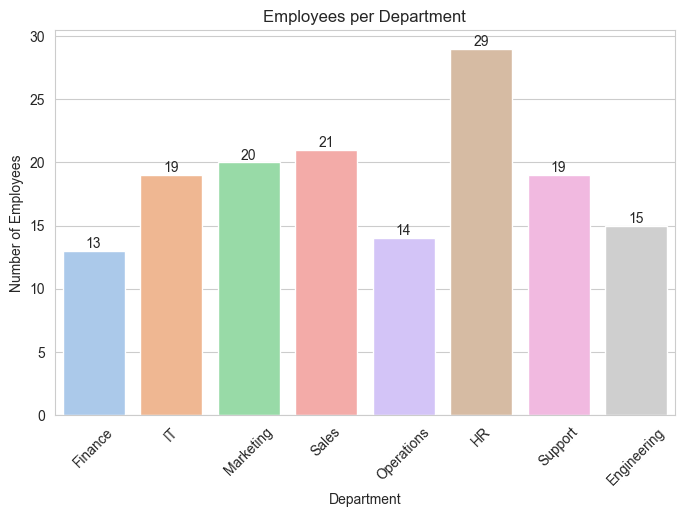

In [8]:
#Final Seaborn Version (Clean & Professional)
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x="Department",
    data=df,
    palette="pastel"
)

plt.title("Employees per Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width()/2,   # middle of bar
        bar.get_height(),                   # top of bar
        int(bar.get_height()),
        ha="center",   # center horizontally
        va="bottom"   # sit just above the bar
    )

plt.show()


# 4️⃣ Histogram – Salary Distribution

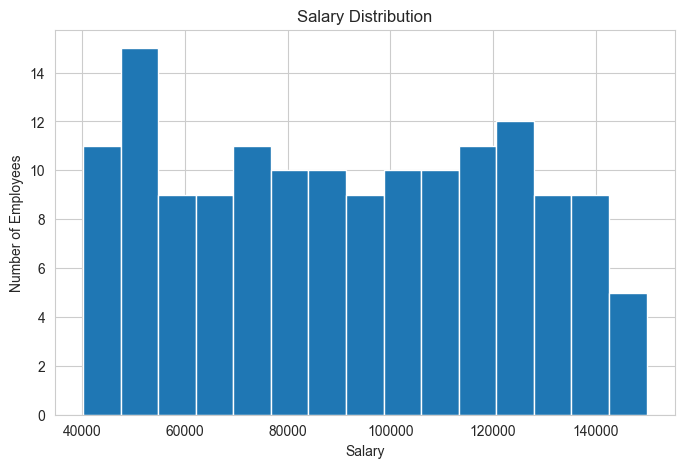

In [9]:
#👉 Question: How salaries are spread?
plt.figure(figsize = (8, 5))
plt.hist(df['Salary'], bins = 15)
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.title('Salary Distribution')
plt.show()

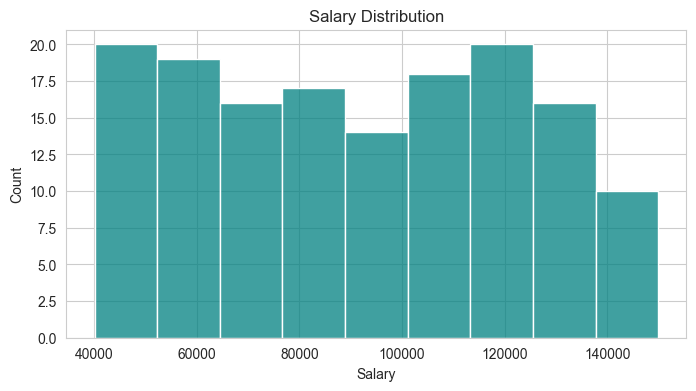

In [10]:
#same graph on seaborn
plt.figure(figsize = (8, 4))
sns.histplot(x = "Salary", data = df, color = "teal")
plt.title('Salary Distribution')
plt.show()

# 🌊 SEABORN (Prettier & Easier)

Seaborn works on top of matplotlib, so graphs look nicer with less code.

# 5️⃣ Count Plot – Employees by Gender

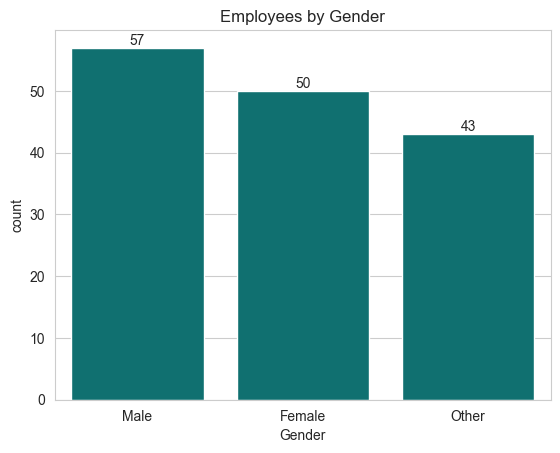

In [11]:
# Question: How many males/females/others?
ax = sns.countplot(x = "Gender", data = df, color = "teal")
plt.title('Employees by Gender')

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width()/2,   # middle of bar
        bar.get_height(),                   # top of bar
        int(bar.get_height()),
        ha="center",   # center horizontally
        va="bottom"   # sit just above the bar
    )

plt.show()

# 6️⃣ Box Plot – Salary by Gender

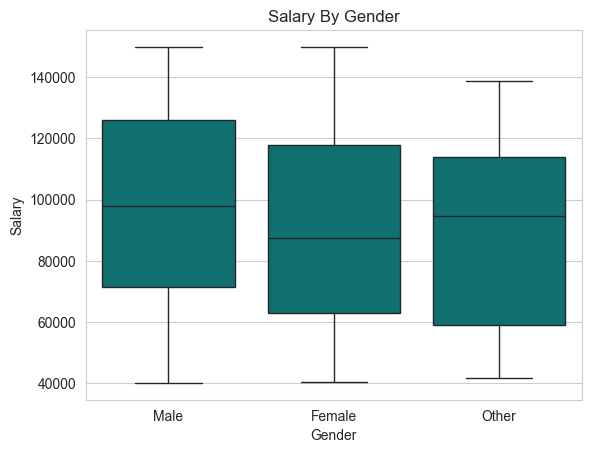

In [12]:
# Question: Who earns more on average?
sns.boxplot(x = "Gender", y = "Salary", data = df, color = "teal")
plt.title('Salary By Gender')

plt.show()

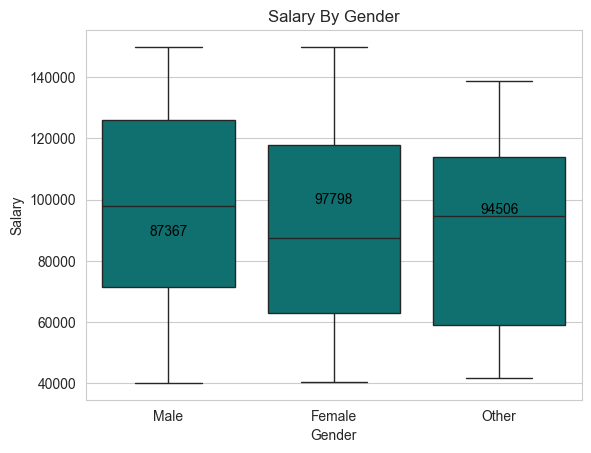

In [13]:
#add data label on box plot :
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(x="Gender", y="Salary", data=df, color="teal")
plt.title("Salary By Gender")

# Calculate medians
medians = df.groupby("Gender")["Salary"].median()

# Add labels
for i, gender in enumerate(medians.index):
    ax.text(
        i,                       # x position (box index)
        medians[gender],         # y position (median value)
        f"{int(medians[gender])}",  # text
        ha="center",
        va="bottom",
        fontsize=10,
        color="black"
    )

plt.show()


Seaborn = Matplotlib + Beauty + Statistics


| Chart Type   | Matplotlib | Seaborn | Interview Level |
| ------------ | ---------- | ------- | --------------- |
| Bar chart    | ✅          | ✅       | Very common     |
| Histogram    | ✅          | ✅       | Very common     |
| Box plot     | ✅          | ✅       | Very common     |
| Scatter plot | ✅          | ✅       | Very common     |
| Line chart   | ✅          | ✅       | Common          |
| Count plot   | ❌          | ✅       | Seaborn only    |
| Heatmap      | ❌          | ✅       | Seaborn only    |
| Violin plot  | ❌          | ✅       | Seaborn only    |


❌ What Seaborn Cannot Do Well

Seaborn is not good for:

Very custom, low-level drawings

Complex subplot layouts

Animations

Interactive plots

For those → Matplotlib is better

# 20 Questions by Trainer:

In [14]:
df.head(10)

,First Name,Last Name,Department,Gender,Location,Joining Date,Joining Month,City,Country,Salary,Bonus
0,Cory,Schroeder,Finance,Male,San Francisco,16-11-2023,November,San Francisco,France,99121,8873
1,Jacqueline,Bowen,IT,Female,San Francisco,28-06-2023,June,San Francisco,India,77594,8206
2,Rhonda,Gonzalez,Marketing,Male,Boston,13-05-2020,May,Boston,Australia,85246,3130
3,Bryan,Clark,Sales,Male,Boston,24-05-2016,May,Boston,Japan,71683,11394
4,Mary,Mcdonald,Operations,Other,Houston,20-02-2020,February,Houston,France,134619,12109
5,John,Rocha,HR,Female,San Francisco,07-09-2017,September,San Francisco,USA,76280,13091
6,Leah,Cooper,Finance,Female,Los Angeles,20-03-2017,March,Los Angeles,India,42203,11404
7,Michael,Wilson,HR,Male,New York,02-12-2016,December,New York,Germany,147564,14573
8,Derrick,Williams,Marketing,Male,Los Angeles,17-08-2019,August,Los Angeles,USA,51295,10476
9,Theresa,Tapia,Marketing,Male,Seattle,13-07-2020,July,Seattle,Japan,50423,10909


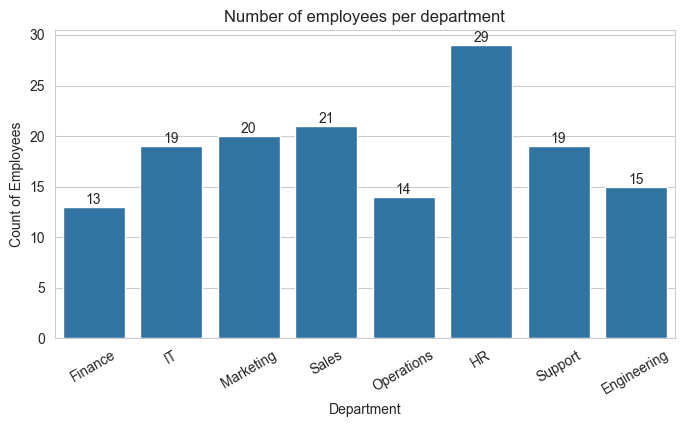

In [15]:
#1 Create a bar chart showing the number of employees in each department.
plt.figure(figsize=(8, 4))
ax = sns.countplot(x = "Department", data = df)
plt.title('Number of employees per department')
plt.xlabel('Department')
plt.xticks(rotation = 30)
plt.ylabel('Count of Employees')
#data label
# Add data labels
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x position
        bar.get_height(),                   # y position
        int(bar.get_height()),               # label text
        ha="center",
        va="bottom"
    )

plt.show()
    

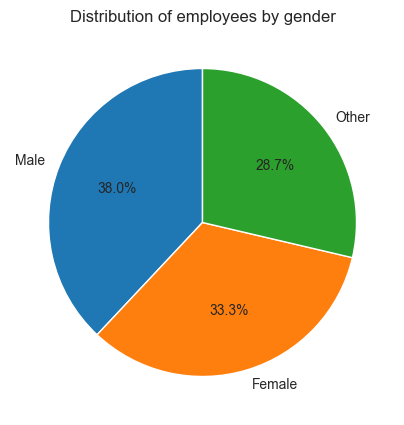

In [16]:
#2.	Plot a pie chart representing the distribution of employees by gender.
gender_count = df['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_count.values, labels= gender_count.index,  autopct="%1.1f%%", startangle = 90)
plt.title('Distribution of employees by gender')
plt.show()

Seaborn can not make piechart, can only be form through matplotlib

In [17]:
#3.	Create a line chart showing the total salary paid per year.

#convert Joining Year in to date time data type
df['Joining Date'] = pd.to_datetime(df['Joining Date'])
#extracting Year from Joining Date
df["Joining Year"] = df["Joining Date"].dt.year    #for year
#calculate total salary per year using sum
salary_per_year = df.groupby('Joining Year')['Salary'].sum().reset_index()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17508\3547131714.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Joining Date'] = pd.to_datetime(df['Joining Date'])


In [18]:
df.head()

,First Name,Last Name,Department,Gender,Location,Joining Date,Joining Month,City,Country,Salary,Bonus,Joining Year
0,Cory,Schroeder,Finance,Male,San Francisco,2023-11-16,November,San Francisco,France,99121,8873,2023
1,Jacqueline,Bowen,IT,Female,San Francisco,2023-06-28,June,San Francisco,India,77594,8206,2023
2,Rhonda,Gonzalez,Marketing,Male,Boston,2020-05-13,May,Boston,Australia,85246,3130,2020
3,Bryan,Clark,Sales,Male,Boston,2016-05-24,May,Boston,Japan,71683,11394,2016
4,Mary,Mcdonald,Operations,Other,Houston,2020-02-20,February,Houston,France,134619,12109,2020


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   First Name     150 non-null    object        
 1   Last Name      150 non-null    object        
 2   Department     150 non-null    object        
 3   Gender         150 non-null    object        
 4   Location       150 non-null    object        
 5   Joining Date   150 non-null    datetime64[ns]
 6   Joining Month  150 non-null    object        
 7   City           150 non-null    object        
 8   Country        150 non-null    object        
 9   Salary         150 non-null    int64         
 10  Bonus          150 non-null    int64         
 11  Joining Year   150 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 13.6+ KB


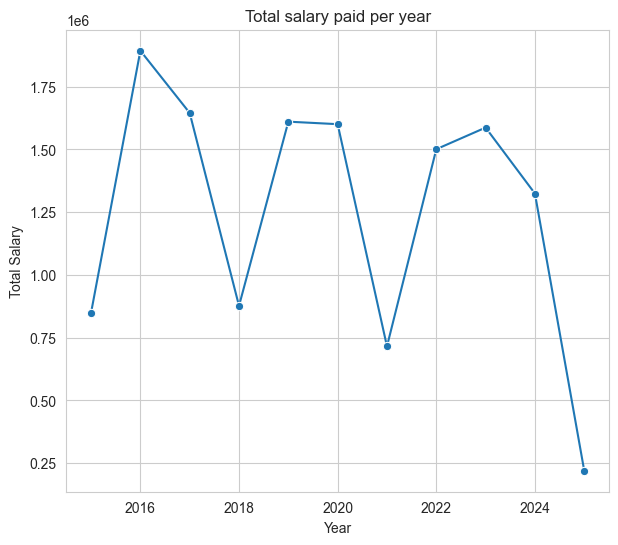

In [20]:
#now plot line chart
plt.figure(figsize = (7, 6))
sns.lineplot(x = "Joining Year", y = "Salary", data=salary_per_year, marker="o")
plt.title('Total salary paid per year')
plt.xlabel('Year')
plt.ylabel('Total Salary')
plt.show()

How to read it

The total salary does not increase smoothly

It goes up and down across years

Key observations (from the plot)

Peak years: around 2016, 2019–2020, and 2023

Drops: noticeable drops around 2018, 2021, and a sharp drop in 2025

The sharp fall in the last year usually means:

Fewer employees joined that year, or

Partial / incomplete year data

Interview-style explanation

“The total salary paid per year fluctuates over time rather than showing a steady trend, with some years having significantly higher payroll costs than others.”

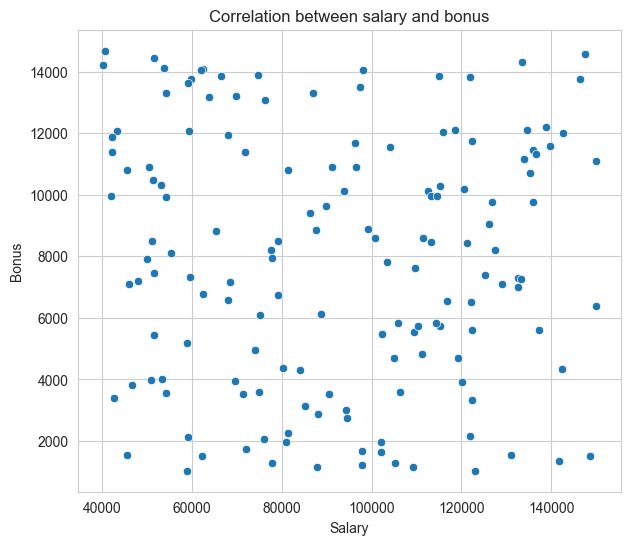

In [21]:
#4.	Plot a scatter plot between salary and bonus to see their correlation.
plt.figure(figsize = (7, 6))
sns.scatterplot(x = "Salary", y = "Bonus", data = df)
plt.title('Correlation between salary and bonus')
plt.xlabel('Salary')
plt.ylabel('Bonus')
plt.show()

“A positive correlation means both variables increase or decrease together, while a negative correlation means one variable increases as the other decreases. A correlation close to zero indicates no linear relationship.”

This chart shows no correlation, Means no correlation between bonus and salary

Scenario 3: No Correlation (≈ 0)

This is what your data shows.

Meaning:

Salary and bonus are independent

Knowing salary tells you nothing about bonus

In [23]:
df.head()

,First Name,Last Name,Department,Gender,Location,Joining Date,Joining Month,City,Country,Salary,Bonus,Joining Year
0,Cory,Schroeder,Finance,Male,San Francisco,2023-11-16,November,San Francisco,France,99121,8873,2023
1,Jacqueline,Bowen,IT,Female,San Francisco,2023-06-28,June,San Francisco,India,77594,8206,2023
2,Rhonda,Gonzalez,Marketing,Male,Boston,2020-05-13,May,Boston,Australia,85246,3130,2020
3,Bryan,Clark,Sales,Male,Boston,2016-05-24,May,Boston,Japan,71683,11394,2016
4,Mary,Mcdonald,Operations,Other,Houston,2020-02-20,February,Houston,France,134619,12109,2020


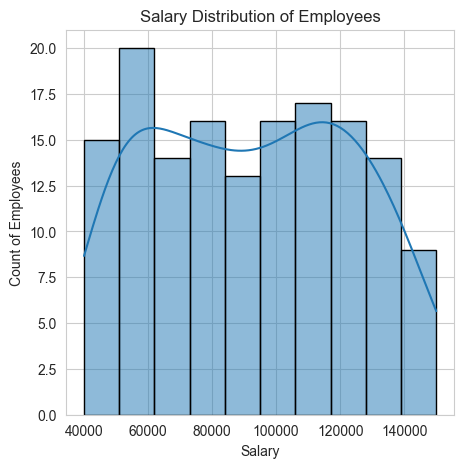

In [29]:
#5.	Create a histogram for salary distribution across all employees.
plt.figure(figsize = (5, 5))
sns.histplot(x = "Salary", data = df, bins= 10, kde=True, edgecolor = "black")
plt.title('Salary Distribution of Employees')
plt.xlabel('Salary')
plt.ylabel('Count of Employees')
plt.show()

🔍 Step-by-step interpretation
1️⃣ Salary Range

Lowest salaries ≈ 40,000

Highest salaries ≈ 150,000

Shows a wide salary range

2️⃣ Where most employees are

Highest bars + KDE peak are around:
👉 60,000 – 120,000

This means:

Most employees earn mid-range salaries

3️⃣ Shape of the distribution (VERY IMPORTANT)

From the KDE curve:

The distribution is slightly right-skewed

Fewer employees earn very high salaries

Many earn low to mid salaries

📌 This is common in real company data.

4️⃣ Outliers (Visual sense)

Very few employees above 140,000

These are likely senior or leadership roles

🎯 Interview-ready explanation (you can say this)

“The histogram shows that employee salaries are spread between approximately 40,000 and 150,000. Most employees fall in the mid-salary range, while fewer employees earn very high salaries. The distribution appears slightly right-skewed, indicating a small number of high earners.”

In [34]:
#6. Plot a stacked bar chart showing the number of employees by department and gender.
#Important interview fact 🧠
#Seaborn does NOT directly support stacked bar charts.
#We usually use Pandas + Matplotlib

#🔹 Step 1: Count employees by Department and Gender
dept_gender_count = df.groupby(['Department','Gender']).size().unstack()
dept_gender_count

Gender,Female,Male,Other
Department,,,
Engineering,6,4,5
Finance,3,6,4
HR,10,11,8
IT,8,3,8
Marketing,4,12,4
Operations,5,3,6
Sales,5,11,5
Support,9,7,3


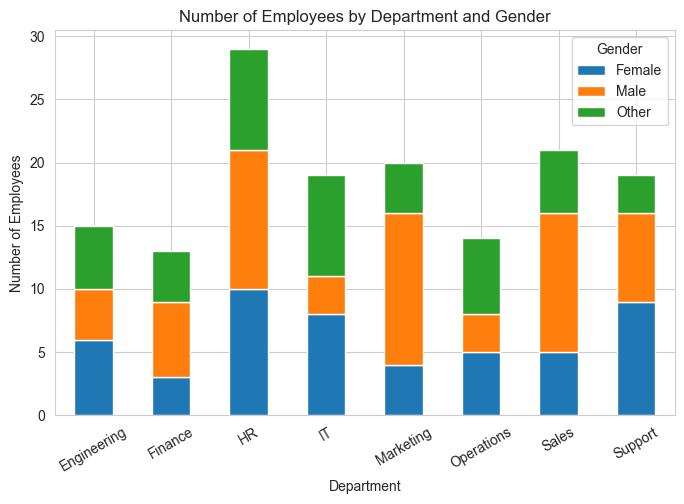

In [35]:
#Step 2: Plot stacked bar chart
dept_gender_count.plot(kind = "bar", stacked = True, figsize = (8, 5))
plt.title("Number of Employees by Department and Gender")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=30)
plt.show()

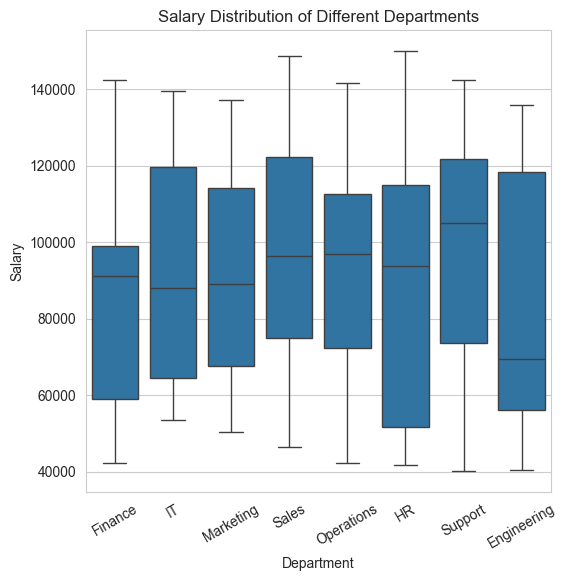

In [37]:
#7.	Generate a box plot for salary distribution across different departments.
plt.figure(figsize = (6, 6))
sns.boxplot(x = "Department", y = "Salary", data = df)
plt.title("Salary Distribution of Different Departments")
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation = 30)
plt.show()

1️⃣ Middle Line (Median Salary)

The line inside each box = median salary

Higher line → higher typical salary

👉 Compare departments:

Department with highest median line pays more (typically)

2️⃣ Box Height (Salary Variation)

Tall box → salaries vary a lot

Short box → salaries are more consistent

Example interpretation:

“IT shows more salary variation compared to HR.”

3️⃣ Whiskers (Salary Range)

Bottom whisker → lower salaries

Top whisker → higher salaries

This shows:

Minimum and maximum salary (excluding outliers)

4️⃣ Dots (If Any) → Outliers

Dots above/below whiskers = outliers

These are unusually high or low salaries

Example:

Senior managers or interns

🎯 Interview-Style Explanation (You Can Say This)

“The box plot compares salary distributions across departments. We can observe differences in median salaries and salary variability. Some departments show wider spreads, indicating higher variation in pay, while others are more consistent.”

In [41]:
#9.	Plot a bar chart showing the number of employees per country.
country_emp_count = df['Country'].value_counts()
country_emp_count

Country
UK           23
Germany      21
India        20
Japan        20
USA          20
France       18
Australia    17
Canada       11
Name: count, dtype: int64

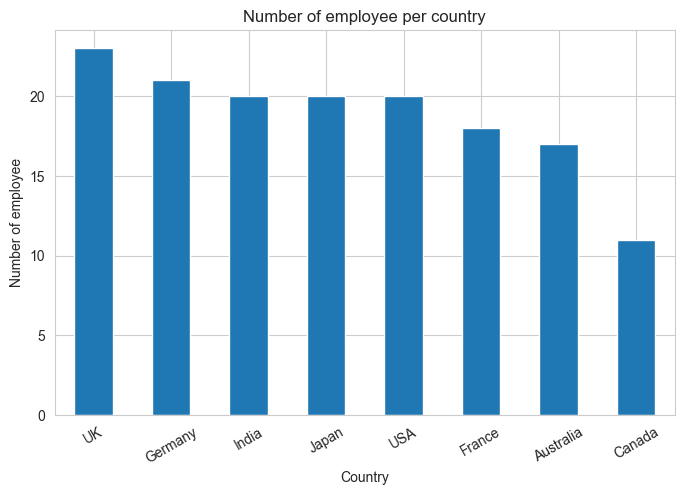

In [43]:
#step 2: 
country_emp_count.plot(kind = 'bar', figsize = (8, 5))
plt.title('Number of employee per country')
plt.xlabel('Country')
plt.ylabel('Number of employee')
plt.xticks(rotation = 30)
plt.show()

| Task                 | Best Method                     |
| -------------------- | ------------------------------- |
| Count categories     | `value_counts()`                |
| Bar chart (counts)   | Pandas plot / `sns.countplot()` |
| Bar chart (averages) | `sns.barplot()`                 |

#above question by seaborn can be solved with:
sns.countplot()

In [45]:
#10. Create a donut chart (modified pie chart) showing department-wise employee count.
#step 1
emp_count_by_dept = df['Department'].value_counts()
emp_count_by_dept

Department
HR             29
Sales          21
Marketing      20
IT             19
Support        19
Engineering    15
Operations     14
Finance        13
Name: count, dtype: int64

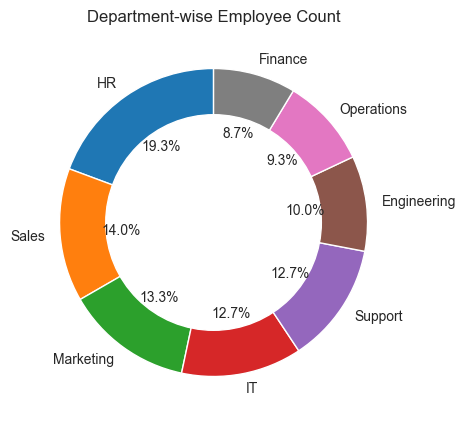

In [49]:
plt.figure(figsize=(5, 5))

plt.pie(
    emp_count_by_dept.values,
    labels=emp_count_by_dept.index,
    autopct="%1.1f%%",
    startangle=90
)

# Add a white circle to make it donut-shaped
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
plt.gca().add_artist(centre_circle)

plt.title("Department-wise Employee Count")
plt.show()


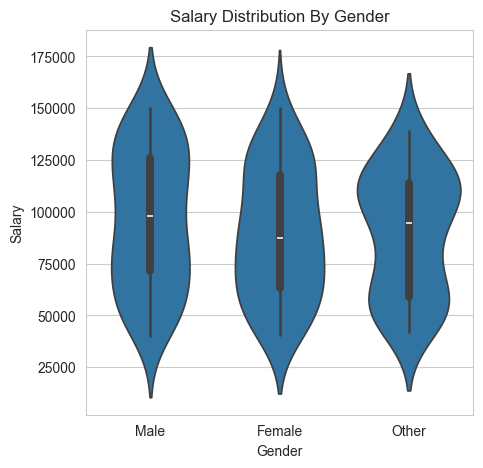

In [51]:
#11. Generate a violin plot to visualize salary distribution by gender.
plt.figure(figsize = (5,5))
sns.violinplot(
    x="Gender",
    y="Salary",
    data=df
)
plt.title('Salary Distribution By Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

1️⃣ X-axis and Y-axis (Start here)

X-axis → Gender (Male, Female, Other)

Y-axis → Salary

Each violin shape represents salary distribution for one gender.

2️⃣ Width of the Violin (MOST IMPORTANT)

👉 Wider part = more employees earning that salary
👉 Narrow part = fewer employees earning that salary

From your plot:

Male: wide around 70k–120k
→ many male employees earn in this range

Female: wide around 60k–110k

Other: wide around 60k–115k

So:

Most employees (across genders) earn mid-range salaries.

3️⃣ Middle Line / Dot (Median Salary)

Inside each violin you see a line or dot:

➡️ This is the median salary

Approximate medians:

Male → ~95–100k

Female → ~85–90k

Other → ~95k

📌 Interpretation:

Male and Other have slightly higher typical salaries than Female in this dataset.

4️⃣ Top and Bottom of the Violin (Salary Range)

Bottom tip → lowest salaries (~40–45k)

Top tip → highest salaries (~140–150k)

This tells us:

Salary range is wide for all genders.

5️⃣ Shape of the Violin (Distribution Insight)
What shape tells us:

Bulges → salary levels where many employees exist

Long tails → fewer employees at extreme salaries

From your plot:

All genders show long upper tails

Indicates a few high earners in each group


“The violin plot shows salary distributions by gender. The width of each violin indicates where salaries are most concentrated. Male and Other categories have slightly higher median salaries, while all groups show a wide salary range with a few high earners.”

Perfect answer ✅

| Box Plot              | Violin Plot            |
| --------------------- | ---------------------- |
| Shows median & spread | Shows median + density |
| Simple                | More detailed          |
| Less visual           | Very visual            |


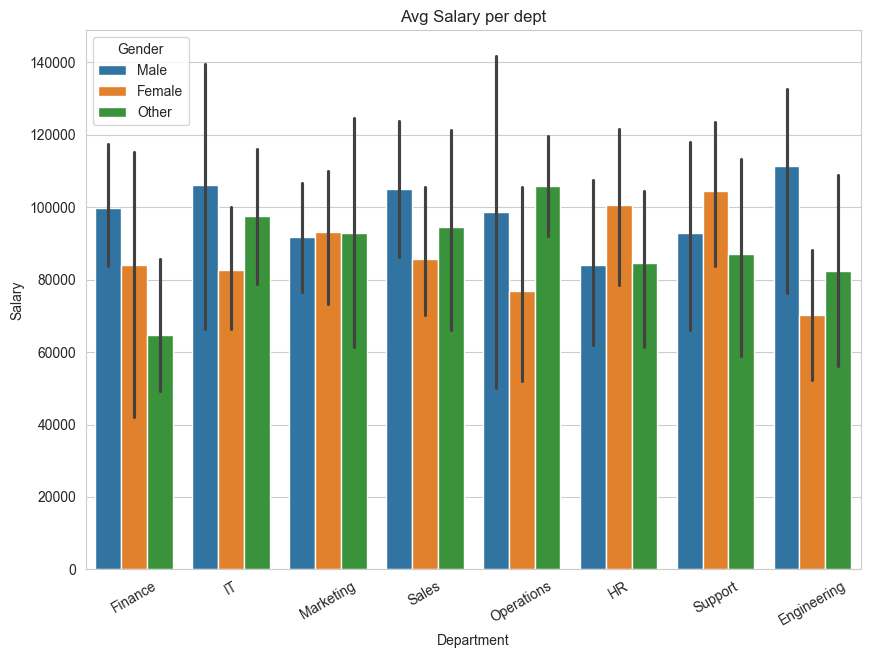

In [56]:
#12. Plot a grouped bar chart comparing average salary per department and Gender.
plt.figure(figsize = (10, 7))
sns.barplot(x = "Department", y = "Salary", hue= "Gender", data = df)
plt.title('Avg Salary per dept')
plt.xlabel('Department')
plt.xticks(rotation = 30)
plt.ylabel('Salary')
plt.show()

2️⃣ Read ONE department at a time (Important habit)
Example: Finance

Male bar ≈ 100k

Female bar ≈ 85k

Other bar ≈ 65k

➡ In Finance, male employees have the highest average salary, followed by female, then other.

Example: IT

Male ≈ 105k

Female ≈ 82k

Other ≈ 95k

➡ In IT, male and other salaries are relatively high, female is lower.

Example: HR

Female ≈ 100k (highest)

Male ≈ 85k

Other ≈ 83k

➡ In HR, female employees earn slightly more on average.

3️⃣ Compare within a department (Gender comparison)

This chart helps answer:

Within the same department, who earns more on average?

General pattern from your chart:

Male average salary is often the highest

Female salaries vary by department

Other category sometimes close to male (e.g., IT, Operations)

4️⃣ Compare across departments (Department comparison)

Look at overall heights:

Engineering, IT, Operations → higher average salaries

Finance, Marketing → mid-range

Support → relatively lower averages

5️⃣ What are the black vertical lines?

Those are confidence intervals / error bars (added automatically by Seaborn).

They show:

Variation in salaries within each group

Larger line → more variation

👉 You don’t need to explain them unless asked.

🎯 Interview-Ready Explanation (You can say this)

“The grouped bar chart compares average salaries across departments and genders. Within most departments, male employees tend to have higher average salaries, though there are exceptions such as HR where females have a higher average. Departments like IT, Engineering, and Operations generally show higher salary levels compared to others.”

This is a perfect answer ✅

🔑 One-Line Memory Rule

Grouped bar chart = compare two categories at the same time

Here:

Category 1 → Department

Category 2 → Gender

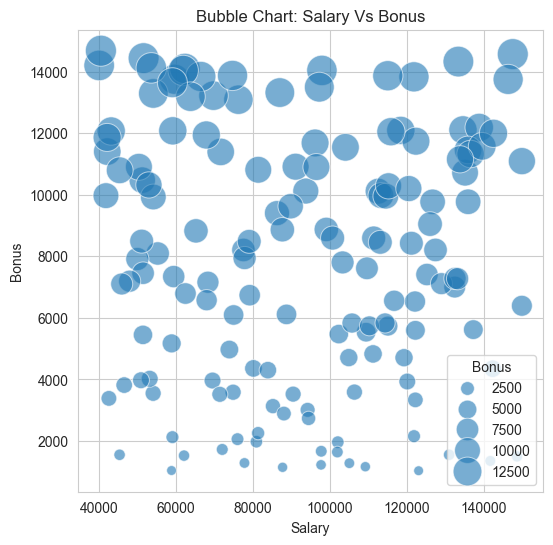

In [57]:
#13.	Create a bubble chart where the bubble size represents the bonus amount and position shows salary.
plt.figure(figsize = (6, 6))

sns.scatterplot(x = "Salary", y = "Bonus", size = "Bonus", sizes = (50, 500), alpha= 0.6, data = df)
#sizes=(50, 500),     # min & max bubble size
# alpha=0.6,           # transparency Makes bubbles slightly transparent (so overlap is visible)
#   size="Bonus",        # bubble size

plt.title('Bubble Chart: Salary Vs Bonus')
plt.xlabel('Salary')
plt.ylabel('Bonus')
plt.show()

1️⃣ Understand the axes first

X-axis → Salary
→ Left = lower salary, right = higher salary

Y-axis → Bonus
→ Bottom = lower bonus, top = higher bonus

Each bubble = one employee.

2️⃣ Bubble size (MOST IMPORTANT)

Big bubble → large bonus

Small bubble → small bonus

The legend on the right confirms this:

Small circles ≈ 2,500 bonus

Big circles ≈ 12,500 bonus

So bubble size shows bonus magnitude.

3️⃣ Position + Size = Insight
🔹 Top-right + large bubble

High salary

High bonus

High total compensation
➡ Senior / top-performing employees

🔹 Bottom-left + small bubble

Low salary

Low bonus
➡ Junior or entry-level employees

🔹 High salary but small bubble

High base salary

Low bonus
➡ Fixed-pay roles

🔹 Low salary but large bubble

Lower base salary

High bonus
➡ Performance-based roles (e.g. sales)

4️⃣ Overall pattern (Correlation)

Look at the overall spread of bubbles:

Bubbles are scattered

Large and small bubbles appear at many salary levels

No clear upward or downward diagonal

✅ Correct conclusion:

Salary and bonus do not show a strong correlation.

This matches what you observed earlier with the scatter plot 👍

5️⃣ Density (Where most employees are)

Most bubbles lie between:

Salary: 60k – 120k

Bonus: 4k – 12k

This suggests:

Most employees earn mid-range salaries and bonuses.

🎯 Interview-Ready Explanation (You can say this)

“The bubble chart shows the relationship between salary and bonus, with bubble size representing the bonus amount. While higher bonuses appear across different salary levels, the overall distribution is scattered, indicating a weak correlation between salary and bonus. The chart also highlights employees with high total compensation in the top-right region.”

That’s a perfect answer ✅

🔑 One-Line Memory Rule

Position = salary & bonus
Size = bonus amount

In [61]:
#14.	Generate a time-series line chart showing the count of employees hired per year.
count_emp_per_year = df['Joining Year'].value_counts().sort_index()
count_emp_per_year

Joining Year
2015    10
2016    20
2017    19
2018    10
2019    16
2020    19
2021     8
2022    16
2023    17
2024    13
2025     2
Name: count, dtype: int64

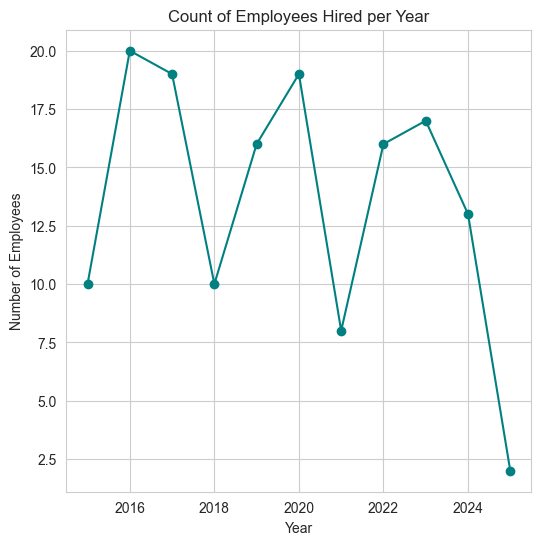

In [62]:
#step 
plt.figure(figsize = (6,6))
count_emp_per_year.plot(kind = 'line', marker = "o", color= 'teal')
plt.title("Count of Employees Hired per Year")
plt.xlabel("Year")
plt.ylabel("Number of Employees")
plt.grid(True)
plt.show()

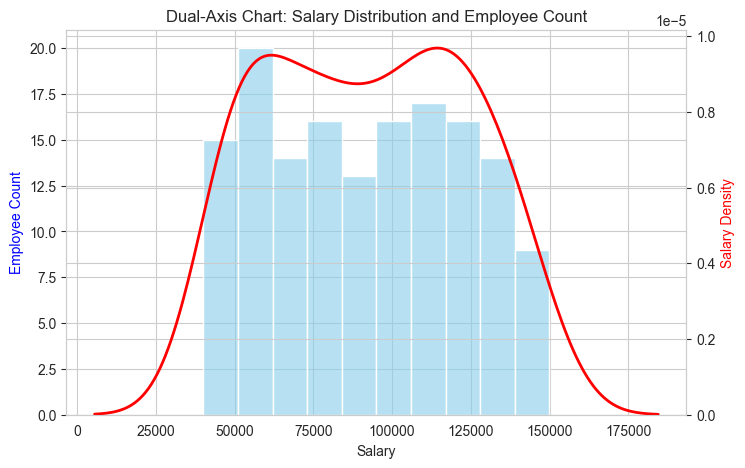

In [68]:
#15. Create a dual-axis chart where one axis shows salary distribution and the other shows employee count.

#Step 1: Create the figure and first axis
fig, ax1 = plt.subplots(figsize = (8, 5))

#Step 2: Plot Salary Distribution (Histogram) → LEFT axis
sns.histplot(df['Salary'], bins = 10, ax = ax1, color = "skyblue", alpha = 0.6)

ax1.set_xlabel("Salary")
ax1.set_ylabel('Employee Count', color = "blue")

#Step 3: Create second Y-axis (RIGHT)
ax2 = ax1.twinx()

#twinx() means:
#“Create another Y-axis sharing the same X-axis”

#Step 4: Plot Salary Distribution Curve (KDE) → RIGHT axis
sns.kdeplot(df['Salary'], ax = ax2, color = "red", linewidth = 2)
ax2.set_ylabel('Salary Density', color = "red")

#This axis shows:
#Shape of salary distribution

#Step 5: Add title and show
plt.title("Dual-Axis Chart: Salary Distribution and Employee Count")
plt.show()

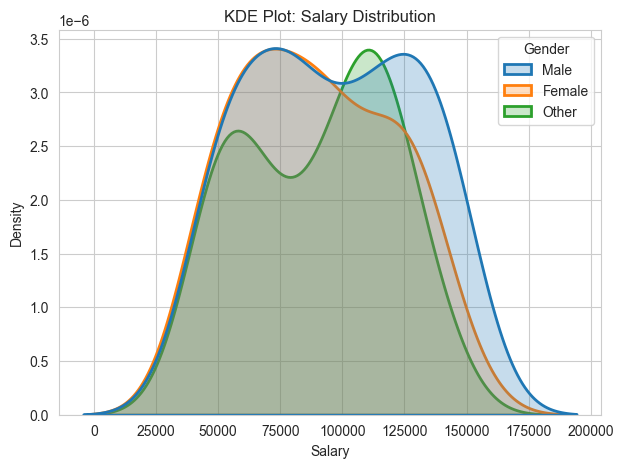

In [71]:
#16.	Create a KDE (Kernel Density Estimate) plot for salary distribution by gender.
plt.figure(figsize = (7, 5))
sns.kdeplot(x = "Salary", data = df, fill = True, hue ="Gender", color = "teal", linewidth = 2)
plt.title('KDE Plot: Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

1️⃣ Start with the axes
X-axis → Salary

Left = lower salaries

Right = higher salaries

Y-axis → Density

⚠️ Very important:

Density is NOT employee count

Higher density = more employees concentrated at that salary level

2️⃣ Understand the colored curves

Each colored curve represents one gender:

🔵 Male

🟠 Female

🟢 Other

They show how salaries are distributed within each gender.

3️⃣ Look at the PEAK of each curve (MOST IMPORTANT)

The highest point of each curve shows:

The salary range where most employees of that gender are concentrated.

From your plot (approximate):

Male peak → around 110k–130k

Female peak → around 70k–90k

Other peak → around 100k–115k

📌 Interpretation:

Male and Other employees tend to have higher typical salaries than Female employees in this dataset.

4️⃣ Compare the POSITION of curves (Left vs Right)

Curves shifted to the right → higher salaries

Curves shifted to the left → lower salaries

From the chart:

Male curve is right-shifted

Female curve is left-shifted

Other lies in between

5️⃣ Width of the curves (Spread)

Wide curve → salaries are more spread out

Narrow curve → salaries are more concentrated

Observation:

Male salaries show wider spread

Female salaries are more concentrated

Other shows moderate spread

6️⃣ Overlap between curves (IMPORTANT INSIGHT)

Notice the overlapping areas:

Large overlap between Male & Female

This means:

Many employees across genders earn similar salaries

So:

Differences exist

But distributions are not completely separate

🎯 Interview-Ready Explanation (You Can Say This)

“The KDE plot compares salary distributions across genders. The male and other categories show peaks at higher salary ranges, while the female distribution peaks at a slightly lower range. There is significant overlap between the curves, indicating that many salaries are similar across genders despite differences in typical salary levels.”

Perfect answer ✅

🔑 One-Line Memory Trick

Peak = most common salary

Right shift = higher pay

Overlap = similar salaries

⚠️ Important Interview Note

If asked:

Can we say salary discrimination from this plot?

Correct answer:

“No, this plot alone does not account for factors like role, experience, or department.”

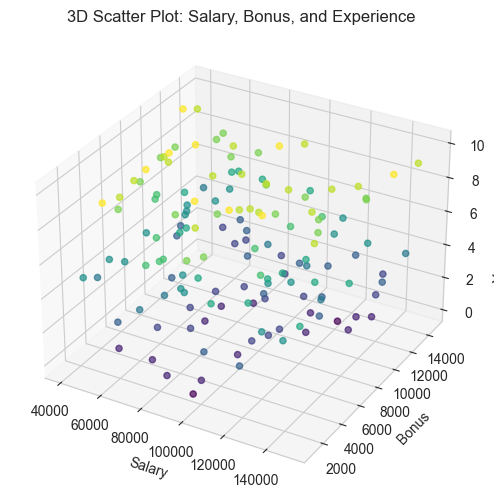

In [73]:
#17.	Generate a 3D scatter plot to visualize salary, bonus, and years of experience.
#Seaborn does not support 3D plots, so we use Matplotlib.

#Step 1: Get “Years of Experience”
current_year = 2025
df["Years_of_Experience"] = current_year - df["Joining Year"]

#Step 2: Correct Code for 3D Scatter Plot (Matplotlib)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    df["Salary"],
    df["Bonus"],
    df["Years_of_Experience"],
    c=df["Years_of_Experience"],
    cmap="viridis",
    alpha=0.7
)

ax.set_xlabel("Salary")
ax.set_ylabel("Bonus")
ax.set_zlabel("Years of Experience")
ax.set_title("3D Scatter Plot: Salary, Bonus, and Experience")

plt.show()

🧊 How to Read the 3D Scatter Plot

“Salary, Bonus, and Experience”

1️⃣ First understand the three axes (VERY IMPORTANT)
🔹 X-axis → Salary

Left → lower salary

Right → higher salary

🔹 Y-axis → Bonus

Front → lower bonus

Back → higher bonus

🔹 Z-axis → Years of Experience

Bottom → less experience

Top → more experience

👉 Each dot = one employee

2️⃣ Color of the dots (Extra information)

The colors (blue → green → yellow) represent:

Years of experience

Darker / yellowish colors → more experience

Bluish colors → less experience

So you are seeing experience twice:

Once by height (Z-axis)

Once by color (helps visually)

3️⃣ How to read patterns (MOST IMPORTANT)
🔹 Salary vs Experience

As you look upwards and to the right:

Many high-experience employees also have higher salaries

This suggests:

Salary tends to increase with experience

(Not perfectly, but a general trend)

🔹 Bonus vs Experience

Bonuses are spread at all experience levels

Some low-experience employees have high bonuses

Some high-experience employees have lower bonuses

This suggests:

Bonus is not strongly tied to experience

🔹 Salary vs Bonus

Points are scattered across salary and bonus

No clear diagonal pattern

This confirms your earlier finding:

Salary and bonus have weak correlation

4️⃣ Clusters (Groups you can notice)

You may notice:

A cluster of low experience + low salary

A cluster of high experience + high salary

Bonuses vary widely within both clusters

These clusters are very common in real employee data.

🎯 Interview-Ready Explanation (You can say this)

“The 3D scatter plot shows the relationship between salary, bonus, and years of experience. We can observe that salary generally increases with experience, while bonuses vary widely across experience levels. This indicates that experience influences salary more strongly than bonus.”

This is a perfect answer ✅

⚠️ Important Interview Insight (Very Impressive)

If asked:

Is a 3D plot easy to interpret?

Best answer:

“3D plots are useful for exploration, but they can be harder to interpret than 2D plots, so they should be used carefully.”

🔑 One-Line Memory Trick

Right = more salary
Back = more bonus
Up = more experience

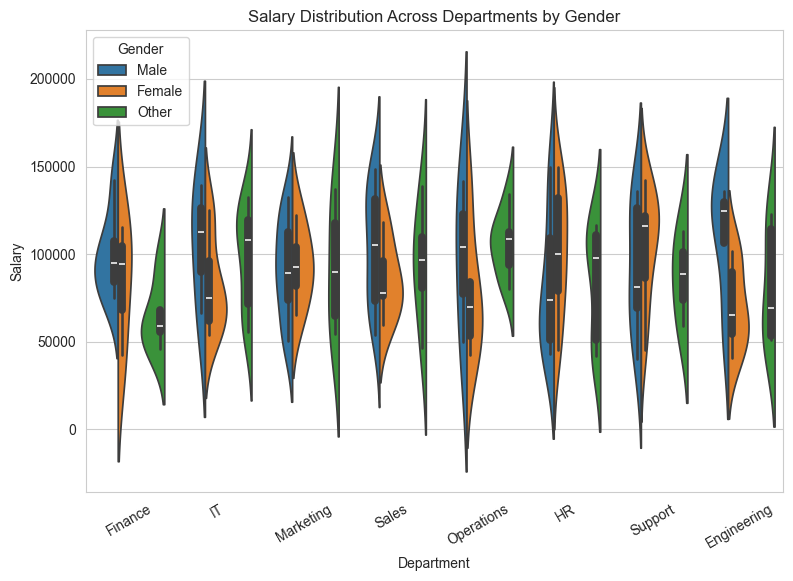

In [75]:
#19. Plot a grouped violin plot showing salary distribution across departments.
plt.figure(figsize = (9, 6))
sns.violinplot(x = "Department", y = "Salary", hue = "Gender", data = df, split = True)
plt.title("Salary Distribution Across Departments by Gender")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.xticks(rotation=30)
plt.show()

2️⃣ Width of each violin (MOST IMPORTANT)

👉 Wider section = more employees earning that salary
👉 Narrow section = fewer employees

So, when you see a wide bulge around 90k:

Many employees earn ~90k in that group

3️⃣ Median line inside each violin

The white line inside each violin = median salary

Higher median line → higher typical salary

Example observations (approximate):

In IT & Engineering, male median salary is relatively high

In HR, female salaries appear competitive or higher

In Support, salaries are generally lower across genders

4️⃣ Height of the violin (Salary range)

Bottom of violin → lowest salaries

Top of violin → highest salaries

This shows:

Salary range and presence of outliers

You can see:

Wider salary ranges in Engineering and Operations

Narrower ranges in Support and HR

5️⃣ Compare in TWO dimensions (Very Important)
🔹 Within a department (Gender comparison)

“In Finance, male salaries have a slightly higher median and wider spread compared to female and other.”

🔹 Across departments (Department comparison)

“Engineering and IT generally show higher salary distributions compared to Support and HR.”

6️⃣ Overlap between violins (IMPORTANT INSIGHT)

Notice overlapping violins:

Indicates many salaries are similar across genders

Differences exist, but distributions overlap significantly

So:

You cannot conclude pay bias from this chart alone.

🎯 Interview-Ready Explanation (You Can Say This)

“The grouped violin plot compares salary distributions across departments and genders. It highlights differences in median salaries and variability, while also showing significant overlap, indicating that salary ranges are similar across genders within departments.”

This answer is excellent ✅

🔑 One-Line Memory Trick

Width = density
Height = salary range
Middle line = median

⚠️ Interview Tip (Very Important)

If asked:

Why use a grouped violin plot instead of a box plot?

Good answer:

“Violin plots provide more detail about the distribution shape, not just summary statistics.”